# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [M. Arif Rahman Hakim]
- **Email:** [arifrahmanhakim1310@gmail.com]
- **ID Dicoding:** [arifrahmanhakim1310]

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda ?
- 2. Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### Data tabel Day

In [236]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Data tabel hours

In [237]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [238]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [239]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [240]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [241]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [242]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [243]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [244]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [245]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning data day_df

##### Duplikat data

In [246]:
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'atemp': 'feels_like_temp',
    'cnt': 'total_rentals',
    'hum': 'humidity'
})

In [247]:
day_df.duplicated().sum()

np.int64(0)

##### Mising value

In [248]:
day_df.isna().sum()

instant              0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
feels_like_temp      0
humidity             0
windspeed            0
casual               0
registered           0
total_rentals        0
dtype: int64

#### Cleaning data hour_df

In [249]:
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'atemp': 'feels_like_temp',
    'cnt': 'total_rentals',
    'hum': 'humidity'
})

In [250]:
hour_df.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,total_rentals
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [251]:
hour_df.duplicated().sum()

np.int64(0)

In [252]:
hour_df.isna().sum()

instant              0
date                 0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
feels_like_temp      0
humidity             0
windspeed            0
casual               0
registered           0
total_rentals        0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [253]:
day_df['status'] = day_df['registered'].apply(lambda x: '[registered]' if x > 0 else '[not registered]')

In [254]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,total_rentals,status
17,18,2011-01-18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683,[registered]
615,616,2012-09-07,3,1,9,0,5,1,1,0.703333,0.657204,0.736250,0.171646,1045,6459,7504,[registered]
424,425,2012-02-29,1,1,2,0,3,1,2,0.344348,0.348470,0.804783,0.179117,65,1769,1834,[registered]
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122,5108,6230,[registered]
501,502,2012-05-16,2,1,5,0,3,1,1,0.636667,0.595975,0.697917,0.122512,991,6433,7424,[registered]


In [255]:
day_df.groupby(by="status").instant.count()

status
[registered]    731
Name: instant, dtype: int64

In [256]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,total_rentals,status
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[registered]
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN


In [257]:
day_df.groupby(by="date").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

instant registered                  
           nunique        max   min    mean std
date                                           
2011-01-01       1        654   654   654.0 NaN
2011-01-02       1        670   670   670.0 NaN
2011-01-03       1       1229  1229  1229.0 NaN
2011-01-04       1       1454  1454  1454.0 NaN
2011-01-05       1       1518  1518  1518.0 NaN
...            ...        ...   ...     ...  ..
2012-12-27       1       1867  1867  1867.0 NaN
2012-12-28       1       2451  2451  2451.0 NaN
2012-12-29       1       1182  1182  1182.0 NaN
2012-12-30       1       1432  1432  1432.0 NaN
2012-12-31       1       2290  2290  2290.0 NaN

[731 rows x 5 columns]

In [258]:
day_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [259]:
# Menghitung jumlah registrasi berdasarkan hari kerja
working_day_registration = day_df[day_df['workingday'] == 1].groupby('date')['registered'].sum().reset_index()

# Mengurutkan berdasarkan jumlah registrasi dan menampilkan 10 hari dengan registrasi terbanyak
top_working_day_registration = working_day_registration.sort_values(by='registered', ascending=False).head(10)

# Menampilkan hasil
print(top_working_day_registration)

           date  registered
435  2012-09-26        6946
432  2012-09-21        6917
444  2012-10-10        6911
454  2012-10-24        6898
440  2012-10-03        6844
425  2012-09-12        6820
430  2012-09-19        6803
391  2012-07-25        6790
431  2012-09-20        6781
426  2012-09-13        6750


### Explore data hour_df

In [260]:
hour_df['status'] = day_df['registered'].apply(lambda x: '[registered]' if x > 0 else '[not registered]')

In [261]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,total_rentals,status
672,673,2012-11-03,4,1,11,0,6,0,2,0.343333,0.323846,0.491250,0.270529,1029,4109,5138,[registered]
440,441,2012-03-16,1,1,3,0,5,1,2,0.435833,0.436229,0.842083,0.113192,548,3830,4378,[registered]
648,649,2012-10-10,4,1,10,0,3,1,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691,[registered]
551,552,2012-07-05,3,1,7,0,4,1,1,0.827500,0.761367,0.457917,0.194029,1405,4836,6241,[registered]
499,500,2012-05-14,2,1,5,0,1,1,2,0.573333,0.549900,0.789583,0.212692,342,2501,2843,[registered]


In [262]:
year_map = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_map)

In [263]:
hour_df.groupby(by="status").instant.count()

status
[registered]    731
Name: instant, dtype: int64

In [264]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,total_rentals,status
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[registered]
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN


In [265]:
# Menghitung total peminjaman berdasarkan hari kerja
working_day_borrowings = hour_df[hour_df['workingday'] == 1].groupby('date')['total_rentals'].sum().reset_index()

# Mengurutkan berdasarkan jumlah peminjaman dan menampilkan 10 hari dengan peminjaman terbanyak
top_working_day_borrowings = working_day_borrowings.sort_values(by='total_rentals', ascending=False).head(10)

# Menampilkan hasil
print(top_working_day_borrowings)

           date  total_rentals
306  2012-03-23           8362
391  2012-07-25           8173
432  2012-09-21           8167
442  2012-10-05           8156
427  2012-09-14           8009
425  2012-09-12           7870
426  2012-09-13           7804
424  2012-09-11           7767
412  2012-08-23           7765
359  2012-06-08           7736


In [266]:
# Menghitung total peminjaman berdasarkan hari libur
holiday_borrowings = hour_df[hour_df['workingday'] == 0].groupby('date')['total_rentals'].sum().reset_index()

# Mengurutkan berdasarkan jumlah peminjaman dan menampilkan 10 hari dengan peminjaman terbanyak
top_holiday_borrowings = holiday_borrowings.sort_values(by='total_rentals', ascending=False).head(10)

# Menampilkan hasil
print(top_holiday_borrowings)


           date  total_rentals
195  2012-09-15           8714
199  2012-09-29           8555
197  2012-09-22           8395
158  2012-05-19           8294
194  2012-09-09           8227
163  2012-06-02           8120
206  2012-10-20           8090
201  2012-10-06           7965
198  2012-09-23           7907
186  2012-08-18           7865


### Explore data hour dan day

In [267]:
day_df.describe(include="all")
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,windspeed,casual,registered,total_rentals,status
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[registered]
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN


In [268]:
# Menghitung total registrasi berdasarkan tanggal
registration_counts = day_df.groupby('date')['registered'].sum().reset_index()

# Mengurutkan berdasarkan jumlah registrasi dan menampilkan 10 tanggal dengan registrasi terbanyak
top_registration_counts = registration_counts.sort_values(by='registered', ascending=False).head(10)

# Menampilkan hasil
print(top_registration_counts)

           date  registered
634  2012-09-26        6946
629  2012-09-21        6917
648  2012-10-10        6911
662  2012-10-24        6898
641  2012-10-03        6844
620  2012-09-12        6820
627  2012-09-19        6803
571  2012-07-25        6790
628  2012-09-20        6781
621  2012-09-13        6750


### Explor data all_df


In [269]:
all_df = pd.merge(
    left=day_df,  # DataFrame kiri
    right=hour_df,  # DataFrame kanan
    how="left",  # Jenis penggabungan
    left_on="date",  # Kolom dari day_df untuk penggabungan
    right_on="date"  # Kolom dari hour_df untuk penggabungan
)

# Menampilkan 5 baris pertama dari DataFrame hasil penggabungan
print(all_df.head())

   instant_x        date  season_x  year_x  month_x  holiday_x  weekday_x  \
0          1  2011-01-01         1    2011        1          0          6   
1          1  2011-01-01         1    2011        1          0          6   
2          1  2011-01-01         1    2011        1          0          6   
3          1  2011-01-01         1    2011        1          0          6   
4          1  2011-01-01         1    2011        1          0          6   

   workingday_x  weather_condition_x    temp_x  ...  workingday_y  \
0             0                    2  0.344167  ...             0   
1             0                    2  0.344167  ...             0   
2             0                    2  0.344167  ...             0   
3             0                    2  0.344167  ...             0   
4             0                    2  0.344167  ...             0   

   weather_condition_y  temp_y  feels_like_temp_y  humidity_y  windspeed_y  \
0                    1    0.24             0

In [270]:
aggregated_data = all_df.groupby(by=["weekday_x", "weather_condition_x"]).agg({
    "registered_x": "sum",  # Jumlah pendaftar
    "total_rentals_y": "sum"            # Jumlah total peminjaman
}).reset_index()

print(aggregated_data)

    weekday_x  weather_condition_x  registered_x  total_rentals_y
0           0                    1       5211675           321787
1           0                    2       2016882           121213
2           0                    3         21768             1027
3           1                    1       5962655           296053
4           1                    2       3171323           156663
5           1                    3         61100             2787
6           2                    1       6437288           309374
7           2                    2       3122703           148185
8           2                    3        257558            11550
9           3                    1       7122386           341397
10          3                    2       2605062           121346
11          3                    3        221526            10305
12          4                    1       6939751           336000
13          4                    2       3121245           145245
14        

In [271]:
# Mengelompokkan data berdasarkan jam dan menghitung total peminjaman
hourly_borrowings = hour_df.groupby(by="hour").agg({
    "total_rentals": "sum",   # Total peminjaman per jam
    "registered": "sum"        # Total registrasi per jam
}).reset_index()

print(hourly_borrowings)

    hour  total_rentals  registered
0      0          39130       31755
1      1          24164       19455
2      2          16352       12940
3      3           8174        6281
4      4           4428        3554
5      5          14261       13249
6      6          55132       52115
7      7         154171      146134
8      8         261001      245240
9      9         159438      136980
10    10         126257       92468
11    11         151320      108034
12    12         184414      134696
13    13         184919      132206
14    14         175652      120563
15    15         183149      128543
16    16         227748      173914
17    17         336860      282640
18    18         309772      265276
19    19         226789      191284
20    20         164550      138172
21    21         125445      104875
22    22          95612       79412
23    23          63941       52876


In [272]:
day_df.to_csv("data_sewa_sepeda_clean.csv", index=False)

**Insight:**
 pada explor data ini kita melakukan explo terkait total rental perjam, jumlah pendaftar dan totoal peminjam. explor ini juga berfokus pada analisis terkait pekembangan peminjam hari libur dan hari kerja memiliki perbedaan ynag sangat tinggi, sehingga pada explor ini kita melakukan penggabungan data untuk menemukan hasil explor keseluruhan data. 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

In [273]:
day_df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [274]:
day_df['year'].value_counts()

year
2012    366
2011    365
Name: count, dtype: int64

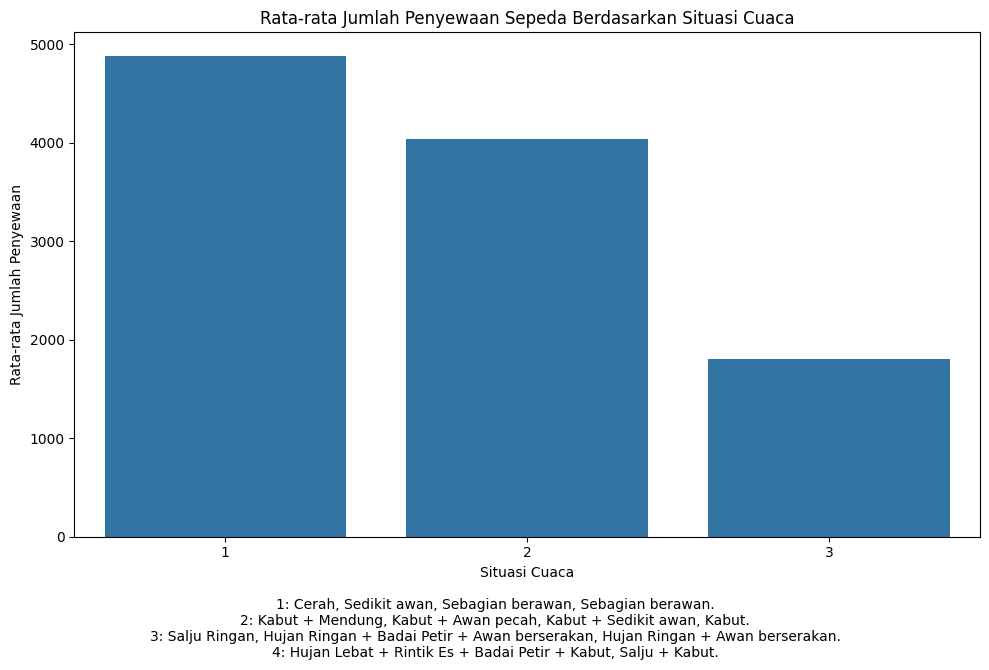

In [275]:
weather_effect = day_df.groupby('weather_condition')['total_rentals'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=weather_effect, x='weather_condition', y='total_rentals')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')

plt.figtext(0.5, -0.1, 
            "1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan.\n"
            "2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut.\n"
            "3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan.\n"
            "4: Hujan Lebat + Rintik Es + Badai Petir + Kabut, Salju + Kabut.",
            ha='center', fontsize=10, wrap=True)

plt.tight_layout()  # Untuk mengatur layout agar tidak terpotong
plt.show()

### Pertanyaan 2:

### Bagaimana pengaruh peminjaman sepeda pada saat hari libur dan hari kerja?

In [276]:
df_working_days = day_df.pivot_table(
    index=['year', 'month'],
    columns='workingday',
    values='instant',  # 'instant' adalah indeks unik untuk menghitung jumlah baris
    aggfunc='count'
).reset_index()

# Mengganti nama kolom untuk lebih mudah dipahami
df_working_days.columns = ['year', 'month', 'non_working_days', 'working_days']
df_working_days.head()

,year,month,non_working_days,working_days
0,2011,1,11,20
1,2011,2,9,19
2,2011,3,8,23
3,2011,4,10,20
4,2011,5,10,21


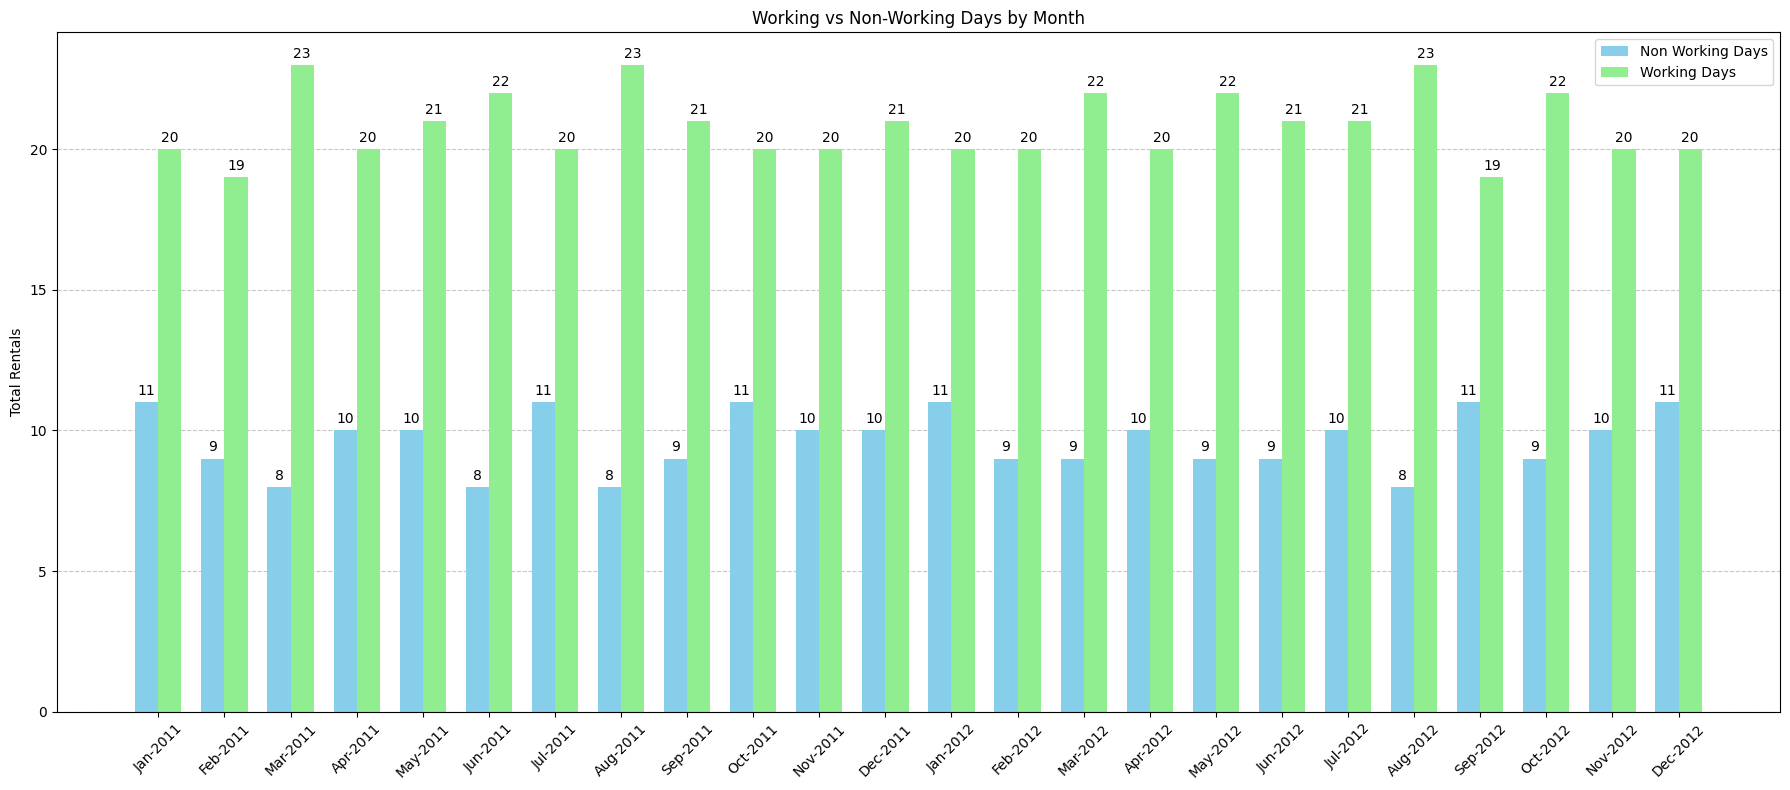

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Membuat kolom datetime untuk pengurutan
df_working_days['date'] = pd.to_datetime(df_working_days.apply(lambda x: f"{x['year']}-{x['month']}-01", axis=1))
df_working_days = df_working_days.sort_values('date')  # Mengurutkan berdasarkan tanggal

# Membuat format label bulan-tahun
month_year_labels = df_working_days['date'].dt.strftime('%b-%Y')

# Membuat plot
fig, ax = plt.subplots(figsize=(18, 8))

# Posisi x untuk batang
x = np.arange(len(df_working_days))
width = 0.35

# Membuat batang
rects1 = ax.bar(x - width/2, df_working_days['non_working_days'], width, 
                label='Non Working Days', color='skyblue')
rects2 = ax.bar(x + width/2, df_working_days['working_days'], width,
                label='Working Days', color='lightgreen')

# Kustomisasi grafik
ax.set_ylabel('Total Rentals')
ax.set_title('Working vs Non-Working Days by Month')
ax.set_xticks(x)
ax.set_xticklabels(month_year_labels, rotation=45)
ax.legend()

# Menambahkan grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Menambahkan nilai di atas batang
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Mengatur margin dan menampilkan plot
plt.tight_layout()
plt.show()

#### Pertanyaan 3:

### Bagaimana lonjakan frekuensi peminjaman sepeda selama 2 tahun terakhir

In [278]:
rental_frequencies = day_df.groupby(['year', 'month']).agg({
    'total_rentals': 'sum',
}).reset_index()

rental_frequencies.head()

# Membuat kolom month_year dalam format YYYY-MM
rental_frequencies['year_month'] = rental_frequencies['year'].astype(str) + '-' + rental_frequencies['month'].astype(str).str.zfill(2)
rental_frequencies['month_year'] = rental_frequencies['month'].astype(str) + '-' + rental_frequencies['year'].astype(str).str.zfill(2)


# Membuat kolom tanggal berdasarkan year dan month
rental_frequencies['date'] = pd.to_datetime(rental_frequencies[['year', 'month']].assign(day=1))

# Mengurutkan data berdasarkan kolom tanggal
rental_frequencies = rental_frequencies.sort_values('date')
rental_frequencies.head()

,year,month,total_rentals,year_month,month_year,date
0,2011,1,38189,2011-01,1-2011,2011-01-01
1,2011,2,48215,2011-02,2-2011,2011-02-01
2,2011,3,64045,2011-03,3-2011,2011-03-01
3,2011,4,94870,2011-04,4-2011,2011-04-01
4,2011,5,135821,2011-05,5-2011,2011-05-01


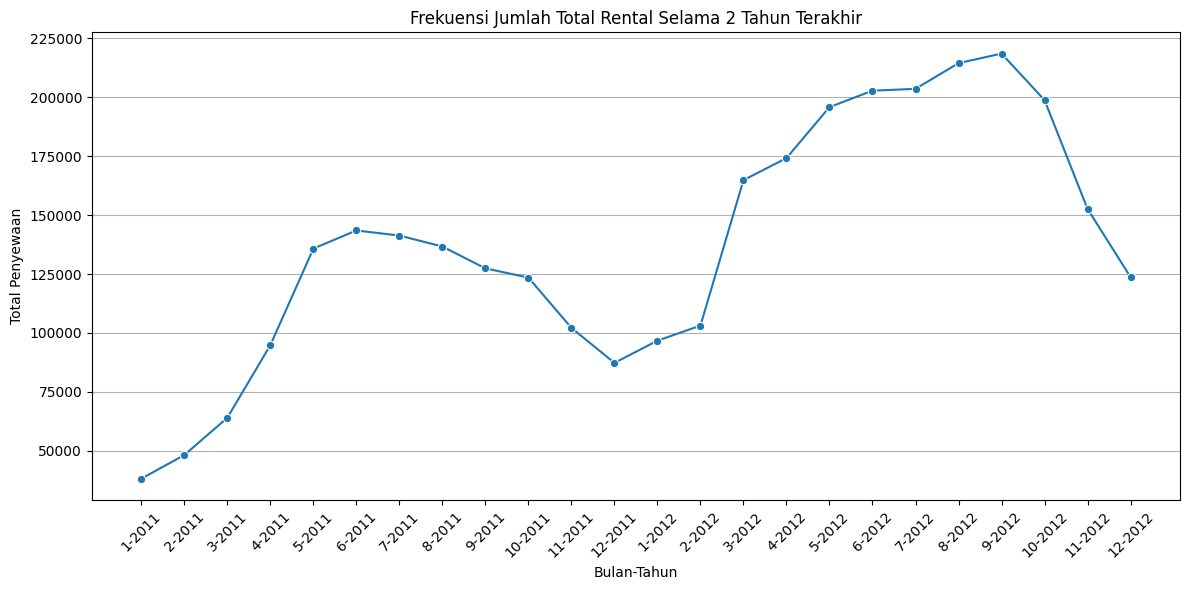

In [279]:
import seaborn as sns
# Plot Line Chart untuk frekuensi penyewaan
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_rentals', data=rental_frequencies, marker='o')

plt.title('Frekuensi Jumlah Total Rental Selama 2 Tahun Terakhir')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)  # Memutar label sumbu X untuk keterbacaan
plt.grid(axis='y')
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan analisis data, cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Ketika kondisi cuaca lebih buruk, seperti hujan atau badai (weather_condition yang menunjukkan cuaca ekstrem), jumlah penyewaan sepeda cenderung menurun. Sebaliknya, pada kondisi cuaca yang cerah atau mendung ringan, penyewaan sepeda meningkat.

Cuaca Buruk (Rainy, Stormy): Pada saat cuaca hujan atau badai, terjadi penurunan jumlah penyewaan karena pengguna merasa tidak nyaman atau berisiko untuk menggunakan sepeda.
Cuaca Cerah atau Mendung: Pada kondisi cuaca yang lebih baik, orang lebih mungkin untuk menggunakan sepeda baik untuk aktivitas rekreasi maupun bekerja, sehingga terjadi peningkatan penyewaan.
Secara umum, ada korelasi negatif antara kondisi cuaca yang buruk dengan jumlah penyewaan sepeda. Cuaca yang ekstrem mengurangi kenyamanan pengguna, sehingga menurunkan jumlah penyewaan.

- Conclution pertanyaan 2 :
Bagaimana pengaruh peminjaman perjam pada saat hari libu dan hari kerja?

Secara singkat, peminjaman per jam lebih aktif pada hari kerja dibandingkan hari libur. Pada hari kerja, jumlah peminjaman lebih tinggi, sering kali melebihi 300 peminjaman per jam, sedangkan pada hari libur jarang melebihi 100. Ini menunjukkan bahwa aktivitas peminjaman lebih sering terjadi pada hari kerja.
